<a href="https://colab.research.google.com/github/harikrishna0007/Hari_Data690/blob/main/assignment_2(hk).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2
Due date: Oct. 3

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [69]:
# codes here

# import all required libraries

import pandas as pd               # to make dataframes and use inbuilt functions and organize the data
import numpy as np                # to run array operations with ease
import datetime                   # coverts string to date time format

import seaborn as sns             # used to plot heat map
import matplotlib.pyplot as plt   # visualizations library used to visulize the key factors

import warnings                   # To set ignore for warnings, if any

!pip install yfinance
import yfinance as yf            # Yahoo finance website to get data in given time period

import seaborn as sns; sns.set() 


yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
#Analyse the stocks of "Ford" & "Tesla"
stocks = ['TSLA','F','FNILX'] 
n = len(stocks)-1

In [71]:
start = datetime.datetime(2021, 1, 1) 
end = datetime.datetime(2021, 6, 1) 
stock_prices = yf.download(stocks, start=start ,end = end, interval='1d')

[*********************100%***********************]  3 of 3 completed


In [72]:
stock_prices.head()    #Check the structure of dataframe and where it starts

Adj Close                        Close                     High  \
                   F      FNILX        TSLA     F  FNILX        TSLA     F   
Date                                                                         
2021-01-04  8.295476  13.119924  243.256668  8.52  13.25  243.256668  8.84   
2021-01-05  8.422050  13.209041  245.036667  8.65  13.34  245.036667  8.72   
2021-01-06  8.607041  13.268451  251.993332  8.84  13.40  251.993332  8.94   
2021-01-07  8.821244  13.476390  272.013336  9.06  13.61  272.013336  9.08   
2021-01-08  8.762825  13.555604  293.339996  9.00  13.69  293.339996  9.14   

                                Low                     Open         \
            FNILX        TSLA     F  FNILX        TSLA     F  FNILX   
Date                                                                  
2021-01-04  13.25  248.163330  8.43  13.25  239.063339  8.81  13.25   
2021-01-05  13.34  246.946671  8.46  13.34  239.733337  8.47  13.34   
2021-01-06  13.40  258.000000  8.68  13.40  249.699997  8.79  13.40   
2021-01-07  13.61  272.329987  8.88  13.61  258.399994  8.94  13.61   
2021-01-08  13.69  294.829987  8.89  13.69  279.463318  9.10  13.69   

                          Volume                   
                  TSLA         F FNILX       TSLA  
Date                                               
2021-01-04  239.820007  85043100     0  145914600  
2021-01-05  241.220001  70127800     0   96735600  
2021-01-06  252.830002  72590200     0  134100000  
2021-01-07  259.209991  77117100     0  154496700  
2021-01-08  285.333344  59162200     0  225166500

In [73]:
stock_prices.tail()    #Check the structure of dataframe and where it ends

Adj Close                         Close                      High  \
                    F      FNILX        TSLA      F  FNILX        TSLA      F   
Date                                                                            
2021-05-24  12.715833  14.773529  202.146667  13.06  14.92  202.146667  13.38   
2021-05-25  12.472423  14.753725  201.563339  12.81  14.90  201.563339  13.43   
2021-05-26  13.533697  14.783432  206.376663  13.90  14.93  206.376663  13.95   
2021-05-27  14.487871  14.803235  210.283340  14.88  14.95  210.283340  15.05   
2021-05-28  14.147095  14.823039  208.406662  14.53  14.97  208.406662  15.05   

                                 Low                      Open         \
            FNILX        TSLA      F  FNILX        TSLA      F  FNILX   
Date                                                                    
2021-05-24  14.92  204.826660  12.92  14.92  191.216660  13.38  14.92   
2021-05-25  14.90  204.663330  12.80  14.90  198.570007  13.13  14.90   
2021-05-26  14.93  208.723328  13.10  14.93  200.500000  13.16  14.93   
2021-05-27  14.95  210.376663  14.12  14.95  205.403336  14.38  14.95   
2021-05-28  14.97  211.863327  14.41  14.97  207.460007  15.01  14.97   

                           Volume                   
                  TSLA          F FNILX       TSLA  
Date                                                
2021-05-24  193.866669  111374300     0  103674300  
2021-05-25  202.436661  113383400     0   84017700  
2021-05-26  202.520004  227538700     0   85917900  
2021-05-27  206.746674  278939100     0   79111800  
2021-05-28  209.500000  152105300     0   68211000

In [74]:
stock_prices.shape # check the size of the stock_prices dataframe

(102, 18)

In [75]:
# consider only the closing price
#(or adj Close as well. But the others are volatile for a day, so we don't consider them)
stock_prices = stock_prices['Close'] 

In [76]:
stock_prices = stock_prices[stocks] 

In [77]:

stock_prices.dropna(inplace=True) # Drop the values or rows where the data is unavialable.

In [78]:

stock_prices.describe() # ".describe()" gives the statistical undersatanding of ht

,TSLA,F,FNILX
count,102.000000,102.000000,102.000000
mean,239.154837,11.782941,14.204020
std,30.071919,1.120774,0.522813
min,187.666672,8.520000,13.250000
25%,218.863327,11.450000,13.790000
50%,233.568329,11.930000,14.060000
75%,265.889160,12.452500,14.747500
max,294.363342,14.880000,15.010000


In [79]:

! pip install fredapi # install the Fred package to get the risk-free rates for each day

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:

#Fred is used to download economic data
from fredapi import Fred

fred = Fred(api_key='a8300c8179c64154ff92e0919073ad17') #  Request the api key from "https://fredaccount.stlouisfed.org/apikey"

In [81]:
fred.search('risk free') # Search for the term 'risk-free' and select "DGS3MO"

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2022-09-29,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-09-30 15:19:07-05:00,92,For further information regarding treasury con...
GS10,GS10,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 10...,1953-04-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-01 15:21:10-05:00,72,Averages of business days. For further informa...
WGS10YR,WGS10YR,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 10...,1962-01-05,2022-09-23,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2022-09-26 15:20:06-05:00,56,Averages of business days. For further informa...
DGS2,DGS2,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2022-09-29,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-09-30 15:19:10-05:00,82,For further information regarding treasury con...
DGS1,DGS1,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 1-...,1962-01-02,2022-09-29,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-09-30 15:20:03-05:00,79,For further information regarding treasury con...
GS2,GS2,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-01 15:21:17-05:00,43,Averages of business days. For further informa...
WGS2YR,WGS2YR,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 2-...,1976-06-04,2022-09-23,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2022-09-26 15:21:10-05:00,37,Averages of business days. For further informa...
GS1,GS1,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 1-...,1953-04-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-01 15:21:15-05:00,53,Averages of business days. For further informa...
WGS1YR,WGS1YR,2022-10-02,2022-10-02,Market Yield on U.S. Treasury Securities at 1-...,1962-01-05,2022-09-23,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2022-09-26 15:21:06-05:00,53,Averages of business days. For further informa...


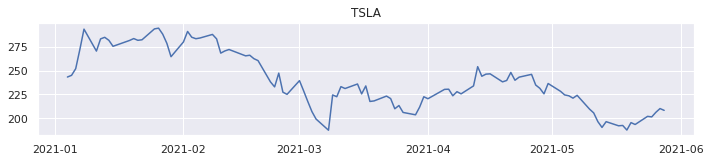

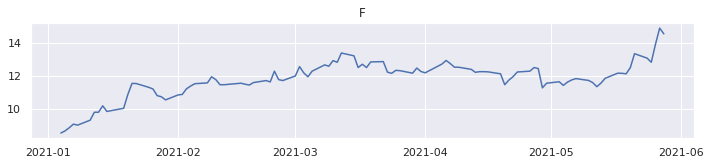

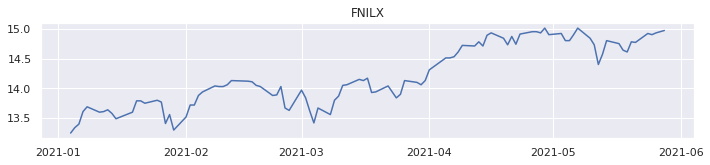

In [82]:

#generate the stocks line chart for each of the stock in the list
for i, stock in enumerate(stock_prices.columns, start=1):
    sns.set
    plt.figure(figsize=(10, 10))
    plt.subplot(5, 1, i)
    plt.plot(stock_prices[stock])
    plt.title(f"{stock}")
    plt.tight_layout()
    plt.show() 

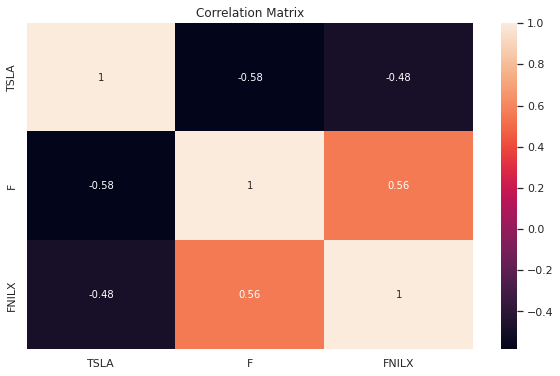

In [83]:

# Generate a heat map for the stocks listed in the stocks

heat_corr = stock_prices.corr() # Generate the corrlation matrix for the stocks listed

plt.figure(figsize=(10, 6)) # Graph size
plt.title("Correlation Matrix") # Title the graph
sns.heatmap(heat_corr, annot=True) # Generate the heat map

plt.show() # print the graph

In [84]:
returns = stock_prices.pct_change() # calculate the percentage change

returns.dropna(inplace=True) # delete the null values in the dataframes

returns.head() # visualize the top 5 records from the returns dataframe

,TSLA,F,FNILX
Date,,,
2021-01-05,0.007317,0.015258,0.006792
2021-01-06,0.028390,0.021965,0.004498
2021-01-07,0.079447,0.024887,0.015672
2021-01-08,0.078403,-0.006623,0.005878
2021-01-11,-0.078214,0.033333,-0.006574


In [86]:
risk_free = fred.get_series('DGS3MO') # get the risk-free values from the fred series

risk_free = risk_free['2021-01-01':'2021-06-01'] # get the values from start date to the end date

risk_free = risk_free / 90

In [87]:
risk_free = risk_free.dropna().iloc[1:-1]

In [88]:
risk_free.iloc[[0, -1]]

2021-01-05    0.001000
2021-05-28    0.000111
dtype: float64

In [89]:
returns.iloc[[0, -1]]# check the first and last dates of returns dataframe

,TSLA,F,FNILX
Date,,,
2021-01-05,0.007317,0.015258,0.006792
2021-05-28,-0.008925,-0.023522,0.001338


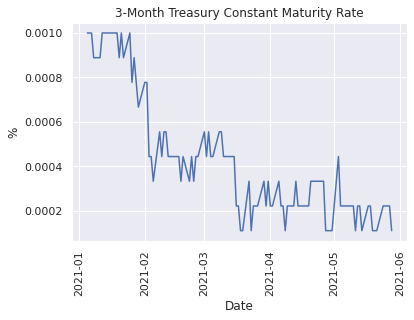

In [90]:
#Plot the risk-free vector sing line plot
plt.plot(risk_free) # plot the risk-free vector

plt.xlabel('Date') #Date on the x-axis

plt.ylabel('%') #The percentage change of the returns which is risk-free

plt.title('3-Month Treasury Constant Maturity Rate') # title the plot

plt.xticks(rotation=90)# rotate the labels of x-axis as they are getting overlapped

plt.show() #Display the graph

In [91]:
# Get the excess returns for each stock compared to that for risk_free 
# Store the results by creating a new column in the returns dataframe
for i in stocks:
    returns[f"excess_return_{i}"] = returns[i] - risk_free

In [92]:
#Display the head of the returns. First 5 records
returns.head()

,TSLA,F,FNILX,excess_return_TSLA,excess_return_F,excess_return_FNILX
Date,,,,,,
2021-01-05,0.007317,0.015258,0.006792,0.006317,0.014258,0.005792
2021-01-06,0.028390,0.021965,0.004498,0.027390,0.020965,0.003498
2021-01-07,0.079447,0.024887,0.015672,0.078447,0.023887,0.014672
2021-01-08,0.078403,-0.006623,0.005878,0.077514,-0.007511,0.004989
2021-01-11,-0.078214,0.033333,-0.006574,-0.079103,0.032444,-0.007463


In [93]:
import statsmodels.api as sm    # import statsmodel as sm to get the 'ordinary least square(OLS)' of each stock

In [94]:
y_F = returns['excess_return_F'] 
X = returns['excess_return_'+stocks[-1]]

In [95]:
X = sm.add_constant(X, prepend=False)
CAPM_F = sm.OLS(y_F, X) 
CAPM_results_F = CAPM_F.fit() 

In [112]:

CAPM_results_F.summary() # the the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        excess_return_F   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.33
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00177
Time:                        04:03:37   Log-Likelihood:                 220.05
No. Observations:                 101   AIC:                            -436.1
Df Residuals:                      99   BIC:                            -430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_FNILX     0.9382      0.292      3.214      0.002       0.359       1.517
const                   0.0045      0.003      1.632      0.106      -0.001       0.010
==============================================================================
Omnibus:                        7.752   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.753
Skew:                           0.115   Prob(JB):                     0.000626
Kurtosis:                       4.858   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:

y_tsla = returns['excess_return_TSLA'] #Assuming the excess returns as the dependent variable

X = returns['excess_return_'+stocks[-1]] # Assuming the standard stocks i.e. FNILX as independent variable

# we are going to analyze how much this standard task can tell about changes in independed variable

In [114]:
X = sm.add_constant(X, prepend=False) # attach the contant to every row as 1

CAPM_TSLA = sm.OLS(y_tsla, X) # Ordinary least square for the values 

CAPM_results_TSLA = CAPM_TSLA.fit() # fit the model 

In [116]:
CAPM_results_TSLA.summary() # get the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_TSLA   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     55.97
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.04e-11
Time:                        04:03:51   Log-Likelihood:                 202.29
No. Observations:                 101   AIC:                            -400.6
Df Residuals:                      99   BIC:                            -395.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_FNILX     2.6038      0.348      7.482      0.000       1.913       3.294
const                  -0.0033      0.003     -1.002      0.319      -0.010       0.003
==============================================================================
Omnibus:                       29.789   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.021
Skew:                           0.962   Prob(JB):                     2.83e-20
Kurtosis:                       7.206   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
#rf:risk_free rate
#ret:return
#rm: market return
def SML(rf,ret,betas):
    asset_ret = [rf + (rm - rf) * i for i in betas] # calculate the  returns of each stock
    plt.plot(betas,asset_ret) # plot the values against the betas
    
    #Label the axes and plot
    plt.title("Security Market Line")
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    #draw the plot
    plt.plot(1,ret,"ro")

In [119]:
ret_cov = returns.iloc[:,:n].cov()

rm = returns[stocks[-1]].mean()
risk_free_mean = risk_free.mean()

betas = [CAPM_results_F.params[0], CAPM_results_TSLA.params[0]]

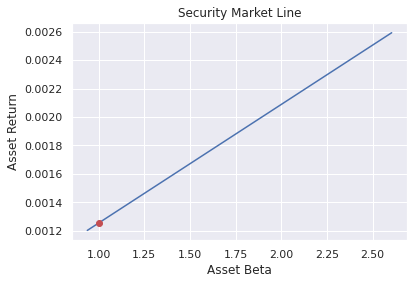

In [120]:
SML(risk_free_mean, rm, betas)

#Inference

- The SML line assists in determining whether the stock is worth the risk. We can use this to determine whether the stock is overpriced or underpriced.

- If a stock is underpriced, it means that the returns are greater than the risk per unit. This is when we buy the stock because the risk is low and the potential returns are high. Likewise, vice versa.

In [122]:
ret_exp = [0.01, 0.005] 
df_betas = pd.DataFrame(betas)
df_ret_exp = pd.DataFrame(ret_exp) 
df_all = pd.concat([df_betas, df_ret_exp],axis=1) 
df_all.columns = ['betas', 'ret_exp'] 
df_all.index = returns.columns[:n]

In [123]:
# compare the values with the expected returns and verify if they are under valued or over valued
def over_under_val(rf,rm,stock):
    x = rf+(rm - rf) * df_all['betas'].loc[stock]
    y = df_all['ret_exp'].loc[stock]
    
    if x < y:
        print('The stock is undervalued')
        
    elif x > y:
        print('The stock is overvalued')
        
    else:
        print('The stock is fairly priced')

In [124]:
df_all # visualize the betas and returns expected values

,betas,ret_exp
TSLA,0.938184,0.010
F,2.603829,0.005


In [129]:
over_under_val(risk_free_mean, rm, 'TSLA')  # check the value of TESLA

The stock is undervalued


In [130]:
over_under_val(risk_free_mean, rm, 'F')   # check the value of Ford 

The stock is undervalued


In [131]:
market_std = returns['excess_return_'+stocks[-1]].std() #Get the standard deviation of the standard stock "FNILX"

In [133]:
# claculate the Sharpe ratio for each stock
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i,j in zip(stocks,range(n_assets)):
        sharpe_ratios[i] = (returns.iloc[:,j].mean() - rf) / np.std(returns.iloc[:,j])
    return sharpe_ratios

In [134]:
# list the returns and calculate sharpe using the function above
stocks = returns.columns[:n]

sharpe_ratios = sharpe(stocks, risk_free_mean,2) 

sharpe_ratios # print the sharpe ratios

{'TSLA': -0.027705730895796254, 'F': 0.18365505403610272}

In [135]:
# Write a function to calculate the Treynor ratio for the stocks
def treynor(stocks,rf,n_assets):
    treynor_ratios = {}
    for i, stock in enumerate(stocks):
        treynor_ratios[stock] = (returns.iloc[:,i].mean() - rf) / df_all['betas'][stock]
    return treynor_ratios

In [136]:
# calculate the Treynor ratio for the stocks using the above function
treynor_ratios = treynor(stocks,risk_free_mean,4)

treynor_ratios # print the values

{'TSLA': -0.0012077340650404732, 'F': 0.0020327018249965212}

In [137]:
print(max(sharpe_ratios, key=sharpe_ratios.get)) # get the stock which has highest sharpe ratio
print(max(sharpe_ratios.values())) # get it's value

F
0.18365505403610272


In [138]:
print(min(sharpe_ratios, key=sharpe_ratios.get))# get the stock which has lowest sharpe ratio
print(min(sharpe_ratios.values())) # get it's value

TSLA
-0.027705730895796254


## **According to the Sharpe ratio, purchasing the Ford can provide greater returns than purchasing Tesla. However, both stocks are undervalued.**

In [139]:
print(max(treynor_ratios, key=treynor_ratios.get))# get the stock which has highest treynor ratio
print(max(treynor_ratios.values())) # get it's value

F
0.0020327018249965212


In [140]:
print(min(treynor_ratios, key=treynor_ratios.get))# get the stock which has lowest treynor ratio
print(min(treynor_ratios.values())) # get it's value

TSLA
-0.0012077340650404732


## **According to Treynor ration, purchasing the Ford can provide greater returns than purchasing Tesla. Ford is expected to provide higher returns, according to both Sharpe and Treynor.**